In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels as sm
import warnings

In [3]:
AAPL_OB2 = pd.read_csv("./data/AAPL/AAPL_2019-01-02_24900000_57900000_orderbook_10.csv", header=None)
AAPL_M2 = pd.read_csv("./data/AAPL/AAPL_2019-01-02_24900000_57900000_message_10.csv", header=None)
AAPL_OB3 = pd.read_csv("./data/AAPL/AAPL_2019-01-03_24900000_57900000_orderbook_10.csv", header=None)
AAPL_M3 = pd.read_csv("./data/AAPL/AAPL_2019-01-03_24900000_57900000_message_10.csv", header=None)
AAPL_OB4 = pd.read_csv("./data/AAPL/AAPL_2019-01-04_24900000_57900000_orderbook_10.csv", header=None)
AAPL_M4 = pd.read_csv("./data/AAPL/AAPL_2019-01-04_24900000_57900000_message_10.csv", header=None)

/var/folders/lz/7z_hp6dd6q308wv0q5lw0zbr0000gn/T/ipykernel_90849/3999352889.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  AAPL_M2 = pd.read_csv("./data/AAPL/AAPL_2019-01-02_24900000_57900000_message_10.csv", header=None)
/var/folders/lz/7z_hp6dd6q308wv0q5lw0zbr0000gn/T/ipykernel_90849/3999352889.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  AAPL_M3 = pd.read_csv("./data/AAPL/AAPL_2019-01-03_24900000_57900000_message_10.csv", header=None)


In [4]:
OB_header = []
for i in range(1, AAPL_OB2.shape[1]//4 + 1):
    OB_header.append(f'ask_price_{i}')
    OB_header.append(f'ask_size_{i}')
    OB_header.append(f'bid_price_{i}')
    OB_header.append(f'bid_size_{i}')

AAPL_OB2.columns = OB_header
AAPL_OB3.columns = OB_header
AAPL_OB4.columns = OB_header
AAPL_OB2

,ask_price_1,ask_size_1,bid_price_1,bid_size_1,ask_price_2,ask_size_2,bid_price_2,bid_size_2,ask_price_3,ask_size_3,...,bid_price_8,bid_size_8,ask_price_9,ask_size_9,bid_price_9,bid_size_9,ask_price_10,ask_size_10,bid_price_10,bid_size_10
0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,...,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0
1,9999999999,0,1250000,100,9999999999,0,-9999999999,0,9999999999,0,...,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0
2,9999999999,0,1307400,1,9999999999,0,1250000,100,9999999999,0,...,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0
3,9999999999,0,1307400,1,9999999999,0,1250000,100,9999999999,0,...,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0
4,9999999999,0,1307400,1,9999999999,0,1250000,100,9999999999,0,...,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093399,1550000,250,1405500,10,1960000,15,1270000,1000,9999999999,0,...,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0
1093400,1550000,250,1405500,10,9999999999,0,1270000,1000,9999999999,0,...,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0
1093401,1550000,250,1270000,1000,9999999999,0,-9999999999,0,9999999999,0,...,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0
1093402,1550000,250,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,...,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0


In [5]:
AAPL_M2 = AAPL_M2.iloc[:,:-1]
AAPL_M3 = AAPL_M3.iloc[:,:-1]
AAPL_M4 = AAPL_M4.iloc[:,:-1]

M_header = ['time', 'event_type', 'order_ID',
            'size', 'price', 'direction']

AAPL_M2.columns = M_header
AAPL_M3.columns = M_header
AAPL_M4.columns = M_header

AAPL_M2

,time,event_type,order_ID,size,price,direction
0,11316.013356,7,0,0,1,-1
1,14400.018599,1,21353,100,1250000,1
2,14400.030102,1,33673,1,1307400,1
3,14400.031059,1,34089,1,1174800,1
4,14400.032449,1,34685,100,960600,1
...,...,...,...,...,...,...
1093399,72000.071248,3,400904933,100,1078900,1
1093400,72000.071249,3,400856821,15,1960000,-1
1093401,72000.071259,3,401483589,10,1405500,1
1093402,72000.071264,3,400878905,1000,1270000,1


In [6]:
AAPL_M2['time'] = pd.to_timedelta(AAPL_M2['time'], unit='s')
AAPL_M3['time'] = pd.to_timedelta(AAPL_M3['time'], unit='s')
AAPL_M4['time'] = pd.to_timedelta(AAPL_M4['time'], unit='s')

# Define the base date
base_date2 = pd.Timestamp('2019-01-02')
base_date3 = pd.Timestamp('2019-01-03')
base_date4 = pd.Timestamp('2019-01-04')

# Add the timedelta (time_sec) to the base date
AAPL_M2['datetime'] = base_date2 + AAPL_M2['time']
AAPL_M3['datetime'] = base_date3 + AAPL_M3['time']
AAPL_M4['datetime'] = base_date4 + AAPL_M4['time']


# Set the index to time_sec
AAPL_M2.set_index('datetime', inplace=True)
AAPL_M3.set_index('datetime', inplace=True)
AAPL_M4.set_index('datetime', inplace=True)

AAPL_M2.drop(columns=['time'], inplace=True)
AAPL_M3.drop(columns=['time'], inplace=True)
AAPL_M4.drop(columns=['time'], inplace=True)


AAPL_M2['event_number'] = range(len(AAPL_M2))
AAPL_M3['event_number'] = range(len(AAPL_M3))
AAPL_M4['event_number'] = range(len(AAPL_M4))

In [7]:
AAPL_OB2.set_index(AAPL_M2.index, inplace=True)
AAPL_OB3.set_index(AAPL_M3.index, inplace=True)
AAPL_OB4.set_index(AAPL_M4.index, inplace=True)

In [8]:
AAPL_M = pd.concat([AAPL_M2, AAPL_M3, AAPL_M4])
AAPL_M

,event_type,order_ID,size,price,direction,event_number
datetime,,,,,,
2019-01-02 03:08:36.013356218,7,0,0,1,-1,0
2019-01-02 04:00:00.018599456,1,21353,100,1250000,1,1
2019-01-02 04:00:00.030101712,1,33673,1,1307400,1,2
2019-01-02 04:00:00.031059467,1,34089,1,1174800,1,3
2019-01-02 04:00:00.032449400,1,34685,100,960600,1,4
...,...,...,...,...,...,...
2019-01-04 20:00:00.066903237,3,402563177,21,1481300,1,1178203
2019-01-04 20:00:00.066913568,3,401950705,7,1412100,1,1178204
2019-01-04 20:00:00.066937486,3,402489641,198,1239200,1,1178205


In [9]:
AAPL_OB = pd.concat([AAPL_OB2, AAPL_OB3, AAPL_OB4])
AAPL_OB

,ask_price_1,ask_size_1,bid_price_1,bid_size_1,ask_price_2,ask_size_2,bid_price_2,bid_size_2,ask_price_3,ask_size_3,...,bid_price_8,bid_size_8,ask_price_9,ask_size_9,bid_price_9,bid_size_9,ask_price_10,ask_size_10,bid_price_10,bid_size_10
datetime,,,,,,,,,,,,,,,,,,,,,
2019-01-02 03:08:36.013356218,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,...,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0
2019-01-02 04:00:00.018599456,9999999999,0,1250000,100,9999999999,0,-9999999999,0,9999999999,0,...,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0
2019-01-02 04:00:00.030101712,9999999999,0,1307400,1,9999999999,0,1250000,100,9999999999,0,...,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0
2019-01-02 04:00:00.031059467,9999999999,0,1307400,1,9999999999,0,1250000,100,9999999999,0,...,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0
2019-01-02 04:00:00.032449400,9999999999,0,1307400,1,9999999999,0,1250000,100,9999999999,0,...,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-04 20:00:00.066903237,9999999999,0,1480000,100,9999999999,0,1479900,1200,9999999999,0,...,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0
2019-01-04 20:00:00.066913568,9999999999,0,1480000,100,9999999999,0,1479900,1200,9999999999,0,...,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0
2019-01-04 20:00:00.066937486,9999999999,0,1480000,100,9999999999,0,1479900,1200,9999999999,0,...,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0


We now implement OFI, we will assume no hidden liquidity first - this assumption is clearly not correct but for the sake of simplification.

In [10]:
AAPL_M_vis = AAPL_M[AAPL_M['event_type'] == 4]
AAPL_OB_l1 = AAPL_OB.iloc[:, :4]

In [11]:
valid_rows = (AAPL_OB_l1['ask_price_1'] != 9999999999) & (AAPL_OB_l1['bid_price_1'] != -9999999999)
AAPL_OB_l1_filt = AAPL_OB_l1[valid_rows]
AAPL_OB_l1_filt['ask_price_1_change'] = AAPL_OB_l1_filt['ask_price_1'] - AAPL_OB_l1_filt['ask_price_1'].shift(1)
AAPL_OB_l1_filt['bid_price_1_change'] = AAPL_OB_l1_filt['bid_price_1'] - AAPL_OB_l1_filt['bid_price_1'].shift(1)
AAPL_OB_l1_filt['midprice'] = (AAPL_OB_l1_filt['ask_price_1'] + AAPL_OB_l1_filt['bid_price_1']) / 2


warnings.filterwarnings('ignore')

/var/folders/lz/7z_hp6dd6q308wv0q5lw0zbr0000gn/T/ipykernel_90849/1392095860.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AAPL_OB_l1_filt['ask_price_1_change'] = AAPL_OB_l1_filt['ask_price_1'] - AAPL_OB_l1_filt['ask_price_1'].shift(1)
/var/folders/lz/7z_hp6dd6q308wv0q5lw0zbr0000gn/T/ipykernel_90849/1392095860.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AAPL_OB_l1_filt['bid_price_1_change'] = AAPL_OB_l1_filt['bid_price_1'] - AAPL_OB_l1_filt['bid_price_1'].shift(1)
/var/folders/lz/7z_hp6dd6q308w

In [12]:
I_bid_ge = (AAPL_OB_l1_filt['bid_price_1_change'] >= 0).astype(int)
I_bid_le = (AAPL_OB_l1_filt['bid_price_1_change'] <= 0).astype(int)
I_ask_le = (AAPL_OB_l1_filt['ask_price_1_change'] <= 0).astype(int)
I_ask_ge = (AAPL_OB_l1_filt['ask_price_1_change'] >= 0).astype(int)


In [13]:
AAPL_OB_l1_filt['en'] = (I_bid_ge * AAPL_OB_l1_filt['bid_size_1'] - I_bid_le * AAPL_OB_l1_filt['bid_size_1'].shift(1) - 
            I_ask_le * AAPL_OB_l1_filt['ask_size_1'] + I_ask_ge * AAPL_OB_l1_filt['ask_size_1'].shift(1))

In [14]:
time_interval = '10S' 
ofi_AAPL = AAPL_OB_l1_filt['en'].resample(time_interval).sum().to_frame()
price_AAPL_r = AAPL_OB_l1_filt['midprice'].resample(time_interval).first()
price_AAPL_r
ofi_AAPL.rename({'en': 'ofi'}, inplace=True)


In [15]:
ofi_AAPL = ofi_AAPL.merge(price_AAPL_r, left_index=True, right_index=True, how='left')

In [16]:
ofi_AAPL['change_midprice'] = ofi_AAPL['midprice'].diff()

Keep only rows where change_midprice within 90th percentile

In [17]:
percentile_5 = ofi_AAPL['change_midprice'].quantile(0.05)
percentile_95 = ofi_AAPL['change_midprice'].quantile(0.95)

# Filter rows where change_midprice is between the 5th and 95th percentiles
filtered_ofi_AAPL = ofi_AAPL[(ofi_AAPL['change_midprice'] >= percentile_5) & (ofi_AAPL['change_midprice'] <= percentile_95)]


In [28]:
lm0 = smf.ols(formula="""change_midprice ~ en - 1""", data=filtered_ofi_AAPL).fit()
lm0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        change_midprice   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):              0.002
Method:                 Least Squares   F-statistic:                              30.91
Date:                Fri, 28 Jun 2024   Prob (F-statistic):                    2.76e-08
Time:                        18:11:36   Log-Likelihood:                         -90793.
No. Observations:               12494   AIC:                                  1.816e+05
Df Residuals:                   12493   BIC:                                  1.816e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
en             0.0031      0.001      5.560      0.000       0.002       0.004
==============================================================================
Omnibus:                       98.798   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.288
Skew:                           0.063   Prob(JB):                     6.30e-33
Kurtosis:                       3.518   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

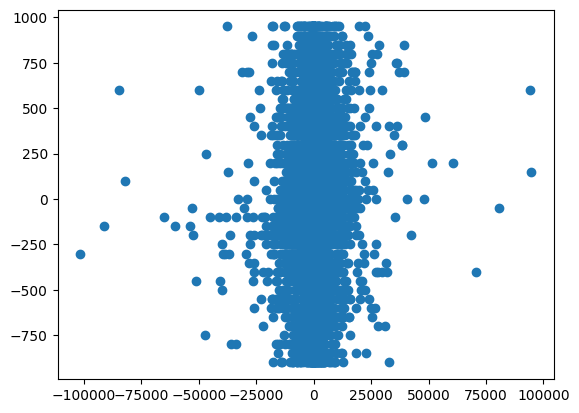

In [48]:
plt.scatter(filtered_ofi_AAPL['en'], filtered_ofi_AAPL['change_midprice'])


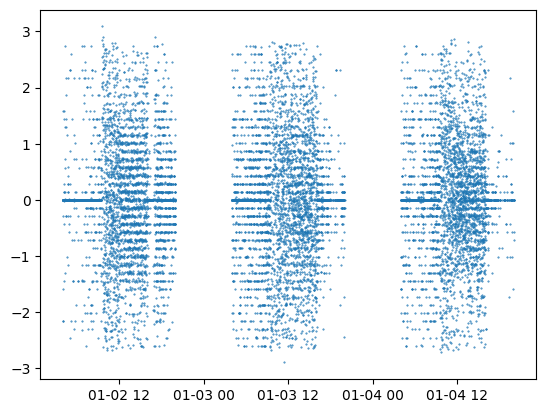

In [51]:
plt.scatter(filtered_ofi_AAPL.index, lm0.get_influence().resid_studentized_internal, s=0.2)

We now implement OFI considering hidden liquidity.

In [30]:
lm0_resid = lm0.resid
lm0_coefs = lm0.params

In [31]:
ofi_AAPL

,en,midprice,change_midprice
datetime,,,
2019-01-02 04:00:00,-914.0,1912400.0,NaN
2019-01-02 04:00:10,10.0,1431850.0,-480550.0
2019-01-02 04:00:20,100.0,1534450.0,102600.0
2019-01-02 04:00:30,100.0,1539100.0,4650.0
2019-01-02 04:00:40,72.0,1538350.0,-750.0
...,...,...,...
2019-01-04 19:59:20,0.0,1483350.0,NaN
2019-01-04 19:59:30,0.0,1483350.0,0.0
2019-01-04 19:59:40,0.0,1483350.0,0.0


In [32]:
I_bid_l = (AAPL_OB_l1_filt['bid_price_1_change'] < 0).astype(int)
I_ask_g = (AAPL_OB_l1_filt['ask_price_1_change'] > 0).astype(int)

In [33]:
AAPL_OB_l1_filt['h_en'] = I_bid_l - I_ask_g

time_interval = '10S' 
odi_AAPL = AAPL_OB_l1_filt['h_en'].resample(time_interval).sum().to_frame()
odi_AAPL.rename(columns={'h_en': 'odi'}, inplace=True)

Filter for extreme values - so index same as available residuals

In [34]:
odi_AAPL_f = odi_AAPL.loc[lm0.resid.index]

In [42]:
odi_res_AAPL_f = odi_AAPL_f.merge(lm0_resid.to_frame(), left_index=True, right_index=True)
odi_res_AAPL_f.rename(columns={0: 'residuals'}, inplace=True)

In [43]:
odi_res_AAPL_f['adj_odi'] = odi_res_AAPL_f['odi'] * - lm0_coefs[0]

In [44]:
lm_hid = smf.ols(formula="""residuals ~ adj_odi - 1""", data=odi_res_AAPL_f).fit()
lm_hid.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              residuals   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              1.473
Date:                Fri, 28 Jun 2024   Prob (F-statistic):                       0.225
Time:                        19:41:56   Log-Likelihood:                         -90793.
No. Observations:               12494   AIC:                                  1.816e+05
Df Residuals:                   12493   BIC:                                  1.816e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
adj_odi     -232.2556    191.344     -1.214      0.225    -607.319     142.807
==============================================================================
Omnibus:                       98.334   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.276
Skew:                           0.064   Prob(JB):                     1.05e-32
Kurtosis:                       3.516   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

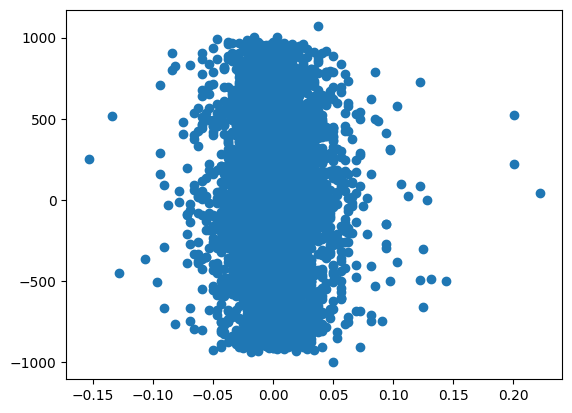

In [40]:
plt.scatter(odi_res_AAPL_f['adj_odi'], odi_res_AAPL_f['residuals'])